# Burgers' equation

---

Consider the advection-diffusion equation, which is a simplified form of the momentum consevation equation for fluid mechanics.

The following form is the non-linear convection-diffusion equation.

$$
\begin{equation}
    \frac{\partial u}{\partial t} + \frac{\partial uu}{\partial x} = ν\frac{\partial^2 u}{\partial x^2}
\end{equation}
$$

The PDE above is written in conservation form.


You will integrate the advection-diffusion equation (in conservation form) using the RK2 method.
You will discretize the spatial derivative in the advection term by using a first order backwards scheme, while the spatial derivative of the diffusive term by a second-order central scheme:


$$
\begin{equation}
\frac{u_i^{n+1}-u_i^n}{\Delta t} + \frac{u_{i}^n u_{i}^n - u_{i-1}^n u_{i-1}^n}{\Delta x} = \nu \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}
\end{equation}
$$

As before, once we have an initial condition, the only unknown is $u_i^{n+1}$. We will step in time as follows:

$$
\begin{equation}
u_i^{n+1} = u_i^n + \Delta t \; ( - \frac{u_{i}^n u_{i}^n - u_{i-1}^n u_{i-1}^n}{\Delta x} + \nu \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2})
\end{equation}
$$

You will use the following inputs to your code.

* $L_x = 20 \;$
* $ν = 0.001 \;$
* $nx = 402$ (including the 2 ghost cells)
* $\Delta t = 0.001 \; $

Initial condition:
$$\begin{equation} u(x,t=0) = 1 \; \end{equation} $$ 

Boundary conditions:
$  \; $ 

$$\begin{equation} u(x=0,t) = 0 \; \end{equation} \;\;\;\;\;\; (Dirichlet \; BC) $$ 

$$\begin{equation} \frac{\partial u}{\partial x}(x=L,t) = 0 \; \end{equation} \;\;\; (Neumann \; BC) $$ 


In [1]:
#---------- Import libraries ----------

import numpy
import matplotlib.pyplot as plt

In [12]:
#---------- Define Functions ----------

def update_bc(u):
    
    """
    
    It updates the BCs for the u 
    
    u : float
        solution of the PDE at the time-step i
    
    """
    
    u[0]  = 0      # Dirichlet BC
    u[-1] = u[-2]  # Neumann BC
    
    return u


def get_augm_array(rhs_int):
    
    """
    
    It merges an array with the two boundary elements
    into an augmented array
    
    rhs_int : float
              array at the time-step i without boundary cells
    
    """
    
    bc_left  = numpy.array([0])   # Just random values to perform operation, no issue since I update the BC!
    bc_right = numpy.array([0])
    
    rhs_augm = numpy.concatenate((bc_left, rhs_int, bc_right))
    
    return rhs_augm


def get_advection(u,dx):
    
    """
    
    It computes the advective term
    
    u  : float
         solution of the PDE at the time-step i
        
    dx : float
         space-step of numerical method
    
    """
    
    advec = (u[1:-1] ** 2 - u[:-2] ** 2) / dx
    
    return advec


def get_diffusion(u,dx):
    
    """
    
    It computes the diffusive term
    
    u  : float
         solution of the PDE at the time-step i
        
    dx : float
         space-step of numerical method
    
    """
    
    diff = (u[2:] - 2 * u[1:-1] + u[:-2]) / (dx ** 2)
    
    return diff


def get_rhs(u,dx):
    
    """
    
    It returns the RHS of PDE
    
    u  : float
         solution of the PDE at the time-step i
        
    dx : float
         space-step of numerical method
    
    """
    
    rhs = - get_advection(u,dx) + get_diffusion(u,dx)
    
    return rhs


def rk2(u,dt,dx):
    
    """
    
    It perfortms the RK2 method to solve ODE
    
    u  : numpy.ndarray
         solution of the PDE at the time-step i
        
    dt : float
         time-step of numerical method
    
    dx : float
         space-step of numerical method
    
    """
    
    # Find K1
    rhs = get_rhs(u,dx)
    rhs = get_augm_array(rhs)
    k1  = dt * rhs
    
    # Find K2
    u_temp = u + 0.5 * k1
    u_temp = update_bc(u_temp)
    rhs    = get_rhs(u_temp,dx)
    rhs    = get_augm_array(rhs)
    k2     = dt * rhs
    
    # Compute solution at next time-step
    u = u + k2
    
    return u

In [13]:
#---------- Define inputs ----------

uo   = 1
nu   = 10 ** -3
lmax = 20
tmax = 10
nx   = 402
dt   = 0.001

In [14]:
#---------- Solve the equation ----------

# Initialise arrays
t         = numpy.arange(0,tmax+dt,dt)
time_step = numpy.arange(1,numpy.size(t),1)

x  = numpy.linspace(0,lmax,nx)
dx = x[1] - x[0]

u_str = numpy.zeros((nx,numpy.size(t)))
t_str = numpy.zeros(numpy.size(t))

# Apply IC
u = numpy.ones(nx) * uo

# Update BC
u = update_bc(u)

# Store data
u_str[:,0] = u

from time import perf_counter

t0 = perf_counter()
for i in time_step:

    # Solve with RK2    
    u = rk2(u,dt,dx)
    
    # Update BC
    u = update_bc(u)
    
    # Store data
    u_str[:,i] = u[:]
    t_str[i]   = i * dt
t1 = perf_counter()
print(f"{1000*(t1-t0):.1f}ms, {i=}")

656.7ms, i=10000


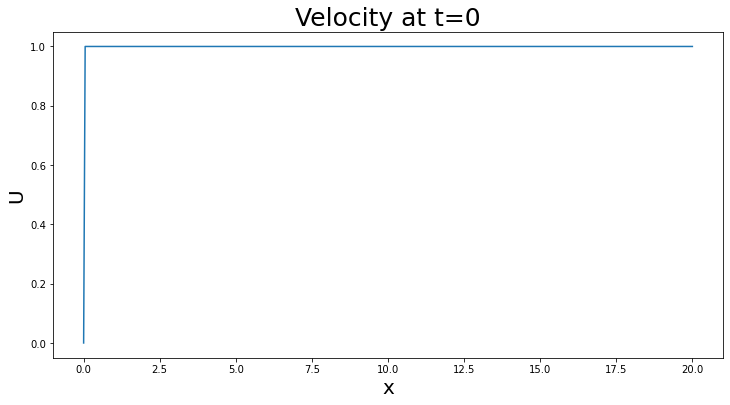

In [8]:
#---------- Plot velocity vs distance ----------

plt.figure(figsize=(12, 6))
plt.title('Velocity at t=0',fontsize=25)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('U', fontsize=20)
plt.plot(x,u_str[:,0])
plt.show()

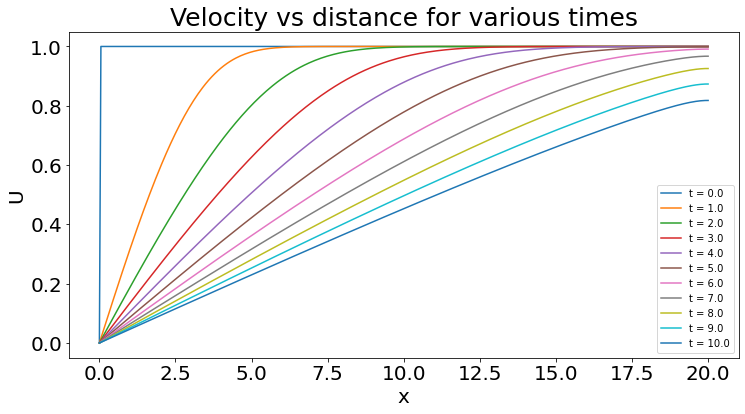

In [9]:
#---------- Plot velocity vs distance ----------

plt.figure(figsize=(12, 6))
plt.title('Velocity vs distance for various times',fontsize=25)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('U', fontsize=20)
for i in range (0,numpy.size(t),1000):
    plt.plot(x,u_str[:,i], label = 't = ' + str(t[i]))
plt.legend()
plt.show()